# <font color=green>In this workbook, technical indicators features will be defined and engineered</font>

# <font color=green> Import Libraries</font>

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
pd.set_option("display.max.columns", None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# <font color=green>H1 Timeframe</font>

In [2]:
# read in 1 hour timeframe price data with multi-class labels
df_h1_merge = pd.read_csv('../data/df_h1_merge.csv', index_col=0)
df_h1_merge.index = pd.to_datetime(df_h1_merge.index)
df_h1_merge = df_h1_merge.dropna()
df_h1_merge.head()

,open,high,low,close,results
2003-01-01 19:00:00,1.0504,1.0504,1.0476,1.0485,2
2003-01-01 20:00:00,1.0487,1.0498,1.0485,1.0487,2
2003-01-01 21:00:00,1.0488,1.0489,1.0477,1.0477,2
2003-01-01 22:00:00,1.0478,1.0483,1.0468,1.0470,2
2003-01-01 23:00:00,1.0469,1.0477,1.0469,1.0476,2


In [3]:
df_h1_merge.shape

(105607, 5)

## <font color=green>Hour of the Day</font>

In [4]:
# Add hour of the Day
df_h1_merge['hr_of_day'] = df_h1_merge.index
df_h1_merge['hr_of_day'] = df_h1_merge['hr_of_day'].dt.hour
df_h1_merge.head()

,open,high,low,close,results,hr_of_day
2003-01-01 19:00:00,1.0504,1.0504,1.0476,1.0485,2,19
2003-01-01 20:00:00,1.0487,1.0498,1.0485,1.0487,2,20
2003-01-01 21:00:00,1.0488,1.0489,1.0477,1.0477,2,21
2003-01-01 22:00:00,1.0478,1.0483,1.0468,1.0470,2,22
2003-01-01 23:00:00,1.0469,1.0477,1.0469,1.0476,2,23


## <font color=green>Day of the Week</font>

In [5]:
# Add day of the week
df_h1_merge['day_of_wk'] = df_h1_merge.index
df_h1_merge['day_of_wk'] = df_h1_merge['day_of_wk'].dt.dayofweek
df_h1_merge.head()

,open,high,low,close,results,hr_of_day,day_of_wk
2003-01-01 19:00:00,1.0504,1.0504,1.0476,1.0485,2,19,2
2003-01-01 20:00:00,1.0487,1.0498,1.0485,1.0487,2,20,2
2003-01-01 21:00:00,1.0488,1.0489,1.0477,1.0477,2,21,2
2003-01-01 22:00:00,1.0478,1.0483,1.0468,1.0470,2,22,2
2003-01-01 23:00:00,1.0469,1.0477,1.0469,1.0476,2,23,2


## <font color=green>Close Prices Shifts</font>

<font color=green>Price movements can be very correlated to their previous period close. We create new columns for shift 1,2,3,5,8,13,21,34,55,89. The relative price distance beteen current close and shifted closed will also be added</font>

In [6]:
df_h1_merge['shift_01'] = df_h1_merge['close'].shift(1)
df_h1_merge['close_shift_01_dist'] = (df_h1_merge['close'] - df_h1_merge['shift_01'])*1000

df_h1_merge['shift_02'] = df_h1_merge['close'].shift(2)
df_h1_merge['close_shift_02_dist'] = (df_h1_merge['close'] - df_h1_merge['shift_02'])*1000

df_h1_merge['shift_03'] = df_h1_merge['close'].shift(3)
df_h1_merge['close_shift_03_dist'] = (df_h1_merge['close'] - df_h1_merge['shift_03'])*1000

df_h1_merge['shift_05'] = df_h1_merge['close'].shift(5)
df_h1_merge['close_shift_05_dist'] = (df_h1_merge['close'] - df_h1_merge['shift_05'])*1000

df_h1_merge['shift_08'] = df_h1_merge['close'].shift(8)
df_h1_merge['close_shift_08_dist'] = (df_h1_merge['close'] - df_h1_merge['shift_08'])*1000

df_h1_merge['shift_13'] = df_h1_merge['close'].shift(13)
df_h1_merge['close_shift_13_dist'] = (df_h1_merge['close'] - df_h1_merge['shift_13'])*1000

df_h1_merge['shift_21'] = df_h1_merge['close'].shift(21)
df_h1_merge['close_shift_21_dist'] = (df_h1_merge['close'] - df_h1_merge['shift_21'])*1000

df_h1_merge['shift_34'] = df_h1_merge['close'].shift(34)
df_h1_merge['close_shift_34_dist'] = (df_h1_merge['close'] - df_h1_merge['shift_34'])*1000

df_h1_merge['shift_55'] = df_h1_merge['close'].shift(55)
df_h1_merge['close_shift_55_dist'] = (df_h1_merge['close'] - df_h1_merge['shift_55'])*1000

df_h1_merge['shift_89'] = df_h1_merge['close'].shift(89)
df_h1_merge['close_shift_87_dist'] = (df_h1_merge['close'] - df_h1_merge['shift_89'])*1000

<font color=green>Relative distances between each shifted prices will also be introduced into the modelling</font>

In [7]:
df_h1_merge['shift_02m01'] = (df_h1_merge['shift_02'] - df_h1_merge['shift_01'])*1000

df_h1_merge['shift_03m02'] = (df_h1_merge['shift_03'] - df_h1_merge['shift_02'])*1000
df_h1_merge['shift_03m01'] = (df_h1_merge['shift_03'] - df_h1_merge['shift_01'])*1000

df_h1_merge['shift_05m03'] = (df_h1_merge['shift_05'] - df_h1_merge['shift_03'])*1000
df_h1_merge['shift_05m02'] = (df_h1_merge['shift_05'] - df_h1_merge['shift_02'])*1000
df_h1_merge['shift_05m01'] = (df_h1_merge['shift_05'] - df_h1_merge['shift_01'])*1000

df_h1_merge['shift_08m05'] = (df_h1_merge['shift_08'] - df_h1_merge['shift_05'])*1000
df_h1_merge['shift_08m03'] = (df_h1_merge['shift_08'] - df_h1_merge['shift_03'])*1000
df_h1_merge['shift_08m02'] = (df_h1_merge['shift_08'] - df_h1_merge['shift_02'])*1000
df_h1_merge['shift_08m01'] = (df_h1_merge['shift_08'] - df_h1_merge['shift_01'])*1000

df_h1_merge['shift_13m08'] = (df_h1_merge['shift_13'] - df_h1_merge['shift_08'])*1000
df_h1_merge['shift_13m05'] = (df_h1_merge['shift_13'] - df_h1_merge['shift_05'])*1000
df_h1_merge['shift_13m03'] = (df_h1_merge['shift_13'] - df_h1_merge['shift_03'])*1000
df_h1_merge['shift_13m02'] = (df_h1_merge['shift_13'] - df_h1_merge['shift_02'])*1000
df_h1_merge['shift_13m01'] = (df_h1_merge['shift_13'] - df_h1_merge['shift_01'])*1000

df_h1_merge['shift_21m13'] = (df_h1_merge['shift_21'] - df_h1_merge['shift_13'])*1000
df_h1_merge['shift_21m08'] = (df_h1_merge['shift_21'] - df_h1_merge['shift_08'])*1000
df_h1_merge['shift_21m05'] = (df_h1_merge['shift_21'] - df_h1_merge['shift_05'])*1000
df_h1_merge['shift_21m03'] = (df_h1_merge['shift_21'] - df_h1_merge['shift_03'])*1000
df_h1_merge['shift_21m02'] = (df_h1_merge['shift_21'] - df_h1_merge['shift_02'])*1000
df_h1_merge['shift_21m01'] = (df_h1_merge['shift_21'] - df_h1_merge['shift_01'])*1000

df_h1_merge['shift_34m21'] = (df_h1_merge['shift_34'] - df_h1_merge['shift_21'])*1000
df_h1_merge['shift_34m13'] = (df_h1_merge['shift_34'] - df_h1_merge['shift_13'])*1000
df_h1_merge['shift_34m08'] = (df_h1_merge['shift_34'] - df_h1_merge['shift_08'])*1000
df_h1_merge['shift_34m05'] = (df_h1_merge['shift_34'] - df_h1_merge['shift_05'])*1000
df_h1_merge['shift_34m03'] = (df_h1_merge['shift_34'] - df_h1_merge['shift_03'])*1000
df_h1_merge['shift_34m02'] = (df_h1_merge['shift_34'] - df_h1_merge['shift_02'])*1000
df_h1_merge['shift_34m01'] = (df_h1_merge['shift_34'] - df_h1_merge['shift_01'])*1000

df_h1_merge['shift_55m34'] = (df_h1_merge['shift_55'] - df_h1_merge['shift_34'])*1000
df_h1_merge['shift_55m21'] = (df_h1_merge['shift_55'] - df_h1_merge['shift_21'])*1000
df_h1_merge['shift_55m13'] = (df_h1_merge['shift_55'] - df_h1_merge['shift_13'])*1000
df_h1_merge['shift_55m08'] = (df_h1_merge['shift_55'] - df_h1_merge['shift_08'])*1000
df_h1_merge['shift_55m05'] = (df_h1_merge['shift_55'] - df_h1_merge['shift_05'])*1000
df_h1_merge['shift_55m03'] = (df_h1_merge['shift_55'] - df_h1_merge['shift_03'])*1000
df_h1_merge['shift_55m02'] = (df_h1_merge['shift_55'] - df_h1_merge['shift_02'])*1000
df_h1_merge['shift_55m01'] = (df_h1_merge['shift_55'] - df_h1_merge['shift_01'])*1000

df_h1_merge['shift_89m55'] = (df_h1_merge['shift_89'] - df_h1_merge['shift_55'])*1000
df_h1_merge['shift_89m34'] = (df_h1_merge['shift_89'] - df_h1_merge['shift_34'])*1000
df_h1_merge['shift_89m21'] = (df_h1_merge['shift_89'] - df_h1_merge['shift_21'])*1000
df_h1_merge['shift_89m13'] = (df_h1_merge['shift_89'] - df_h1_merge['shift_13'])*1000
df_h1_merge['shift_89m08'] = (df_h1_merge['shift_89'] - df_h1_merge['shift_08'])*1000
df_h1_merge['shift_89m05'] = (df_h1_merge['shift_89'] - df_h1_merge['shift_05'])*1000
df_h1_merge['shift_89m03'] = (df_h1_merge['shift_89'] - df_h1_merge['shift_03'])*1000
df_h1_merge['shift_89m02'] = (df_h1_merge['shift_89'] - df_h1_merge['shift_02'])*1000
df_h1_merge['shift_89m01'] = (df_h1_merge['shift_89'] - df_h1_merge['shift_01'])*1000

## <font color=green>Simple Moving Averages</font>

<font color=green> 
- A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.
- The SMA is a technical indicator that can aid in determining if an asset price will continue or reverse a bull or bear trend.
- The relative distances of the current close price to the SMA can also help predict price movement
- We create new columns for SMA with periods 2,3,5,8,13,21,34,55,89. 
- The relative distances between current close price and SMAs will also be added
- formula for SMA: https://en.wikipedia.org/wiki/Moving_average</font>

In [8]:
df_h1_merge['sma_02'] = df_h1_merge['close'].rolling(2).mean()
df_h1_merge['close_sma_02_dist'] = (df_h1_merge['close'] - df_h1_merge['sma_02'])*1000

df_h1_merge['sma_03'] = df_h1_merge['close'].rolling(3).mean()
df_h1_merge['close_sma_03_dist'] = (df_h1_merge['close'] - df_h1_merge['sma_03'])*1000

df_h1_merge['sma_05'] = df_h1_merge['close'].rolling(5).mean()
df_h1_merge['close_sma_05_dist'] = (df_h1_merge['close'] - df_h1_merge['sma_05'])*1000

df_h1_merge['sma_08'] = df_h1_merge['close'].rolling(8).mean()
df_h1_merge['close_sma_08_dist'] = (df_h1_merge['close'] - df_h1_merge['sma_08'])*1000

df_h1_merge['sma_13'] = df_h1_merge['close'].rolling(13).mean()
df_h1_merge['close_sma_13_dist'] = (df_h1_merge['close'] - df_h1_merge['sma_13'])*1000

df_h1_merge['sma_21'] = df_h1_merge['close'].rolling(21).mean()
df_h1_merge['close_sma_21_dist'] = (df_h1_merge['close'] - df_h1_merge['sma_21'])*1000

df_h1_merge['sma_34'] = df_h1_merge['close'].rolling(34).mean()
df_h1_merge['close_sma_34_dist'] = (df_h1_merge['close'] - df_h1_merge['sma_34'])*1000

df_h1_merge['sma_55'] = df_h1_merge['close'].rolling(55).mean()
df_h1_merge['close_sma_55_dist'] = (df_h1_merge['close'] - df_h1_merge['sma_55'])*1000

df_h1_merge['sma_89'] = df_h1_merge['close'].rolling(89).mean()
df_h1_merge['close_sma_89_dist'] = (df_h1_merge['close'] - df_h1_merge['sma_89'])*1000

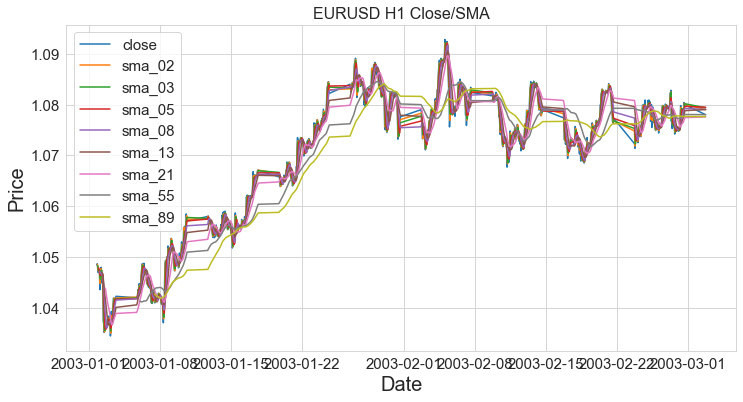

In [9]:
plt.figure(figsize=(12,6))

plt.plot(df_h1_merge['close'][:1000], label='close')
plt.plot(df_h1_merge['sma_02'][:1000], label='sma_02')
plt.plot(df_h1_merge['sma_03'][:1000], label='sma_03')
plt.plot(df_h1_merge['sma_05'][:1000], label='sma_05')
plt.plot(df_h1_merge['sma_08'][:1000], label='sma_08')
plt.plot(df_h1_merge['sma_13'][:1000], label='sma_13')
plt.plot(df_h1_merge['sma_21'][:1000], label='sma_21')
plt.plot(df_h1_merge['sma_55'][:1000], label='sma_55')
plt.plot(df_h1_merge['sma_89'][:1000], label='sma_89')

plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel("Date", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.title(label = 'EURUSD H1 Close/SMA', fontsize=16)
plt.legend(fontsize=15)

<font color=green>Relative distances between each SMAs will also be introduced into the modelling</font>

In [10]:
df_h1_merge['sma_03m02'] = (df_h1_merge['sma_03'] - df_h1_merge['sma_02'])*1000

df_h1_merge['sma_05m03'] = (df_h1_merge['sma_05'] - df_h1_merge['sma_03'])*1000
df_h1_merge['sma_05m02'] = (df_h1_merge['sma_05'] - df_h1_merge['sma_02'])*1000

df_h1_merge['sma_08m05'] = (df_h1_merge['sma_08'] - df_h1_merge['sma_05'])*1000
df_h1_merge['sma_08m03'] = (df_h1_merge['sma_08'] - df_h1_merge['sma_03'])*1000
df_h1_merge['sma_08m02'] = (df_h1_merge['sma_08'] - df_h1_merge['sma_02'])*1000

df_h1_merge['sma_13m08'] = (df_h1_merge['sma_13'] - df_h1_merge['sma_08'])*1000
df_h1_merge['sma_13m05'] = (df_h1_merge['sma_13'] - df_h1_merge['sma_05'])*1000
df_h1_merge['sma_13m03'] = (df_h1_merge['sma_13'] - df_h1_merge['sma_03'])*1000
df_h1_merge['sma_13m02'] = (df_h1_merge['sma_13'] - df_h1_merge['sma_02'])*1000

df_h1_merge['sma_21m13'] = (df_h1_merge['sma_21'] - df_h1_merge['sma_13'])*1000
df_h1_merge['sma_21m08'] = (df_h1_merge['sma_21'] - df_h1_merge['sma_08'])*1000
df_h1_merge['sma_21m05'] = (df_h1_merge['sma_21'] - df_h1_merge['sma_05'])*1000
df_h1_merge['sma_21m03'] = (df_h1_merge['sma_21'] - df_h1_merge['sma_03'])*1000
df_h1_merge['sma_21m02'] = (df_h1_merge['sma_21'] - df_h1_merge['sma_02'])*1000

df_h1_merge['sma_34m21'] = (df_h1_merge['sma_34'] - df_h1_merge['sma_21'])*1000
df_h1_merge['sma_34m13'] = (df_h1_merge['sma_34'] - df_h1_merge['sma_13'])*1000
df_h1_merge['sma_34m08'] = (df_h1_merge['sma_34'] - df_h1_merge['sma_08'])*1000
df_h1_merge['sma_34m05'] = (df_h1_merge['sma_34'] - df_h1_merge['sma_05'])*1000
df_h1_merge['sma_34m03'] = (df_h1_merge['sma_34'] - df_h1_merge['sma_03'])*1000
df_h1_merge['sma_34m02'] = (df_h1_merge['sma_34'] - df_h1_merge['sma_02'])*1000

df_h1_merge['sma_55m34'] = (df_h1_merge['sma_55'] - df_h1_merge['sma_34'])*1000
df_h1_merge['sma_55m21'] = (df_h1_merge['sma_55'] - df_h1_merge['sma_21'])*1000
df_h1_merge['sma_55m13'] = (df_h1_merge['sma_55'] - df_h1_merge['sma_13'])*1000
df_h1_merge['sma_55m08'] = (df_h1_merge['sma_55'] - df_h1_merge['sma_08'])*1000
df_h1_merge['sma_55m05'] = (df_h1_merge['sma_55'] - df_h1_merge['sma_05'])*1000
df_h1_merge['sma_55m03'] = (df_h1_merge['sma_55'] - df_h1_merge['sma_03'])*1000
df_h1_merge['sma_55m02'] = (df_h1_merge['sma_55'] - df_h1_merge['sma_02'])*1000

df_h1_merge['sma_89m55'] = (df_h1_merge['sma_89'] - df_h1_merge['sma_55'])*1000
df_h1_merge['sma_89m34'] = (df_h1_merge['sma_89'] - df_h1_merge['sma_34'])*1000
df_h1_merge['sma_89m21'] = (df_h1_merge['sma_89'] - df_h1_merge['sma_21'])*1000
df_h1_merge['sma_89m13'] = (df_h1_merge['sma_89'] - df_h1_merge['sma_13'])*1000
df_h1_merge['sma_89m08'] = (df_h1_merge['sma_89'] - df_h1_merge['sma_08'])*1000
df_h1_merge['sma_89m05'] = (df_h1_merge['sma_89'] - df_h1_merge['sma_05'])*1000
df_h1_merge['sma_89m03'] = (df_h1_merge['sma_89'] - df_h1_merge['sma_03'])*1000
df_h1_merge['sma_89m02'] = (df_h1_merge['sma_89'] - df_h1_merge['sma_02'])*1000

## <font color=green>Relative Strength Index</font>

<font color=green> 
- The relative strength index (RSI) is a popular momentum oscillator developed in 1978.
- The RSI provides technical traders signals about bullish and bearish price momentum, and it is often plotted beneath the graph of an asset's price.
- An asset is usually considered overbought when the RSI is above 70% and oversold when it is below 30%.
- We create new columns for RSI(14)
- formula for RSI: https://en.wikipedia.org/wiki/Relative_strength_index
</font>

In [11]:
# Create required variables for RSI computation
df_h1_merge['diff'] = df_h1_merge['close'].diff()
df_h1_merge['gain'] = df_h1_merge['diff'].map(lambda cell: 0 if cell<0 else cell )
df_h1_merge['loss'] = df_h1_merge['diff'].map(lambda cell: 0 if cell>0 else cell )
df_h1_merge['loss'] = abs(df_h1_merge['loss'])

In [12]:
# create function for RSI column
def rsi (range):
    df_h1_merge['roll_up'] = df_h1_merge['gain'].ewm(span=range).mean()
    df_h1_merge['roll_dn'] = df_h1_merge['loss'].ewm(span=range).mean()
    df_h1_merge['rs'] = df_h1_merge['roll_up']/df_h1_merge['roll_dn']
    df_h1_merge[f'rsi_{range}'] = 100.0 - (100.0 / (1.0 + df_h1_merge['rs']))
    df_h1_merge.drop(['roll_up','roll_dn','rs'], axis=1, inplace=True)

In [13]:
# create RSI with 14 time periods
rsi(14)

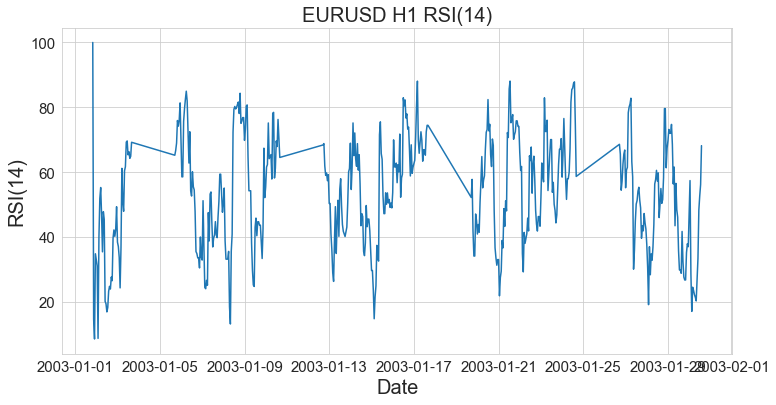

In [14]:
plt.figure(figsize=(12,6))

plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel("Date", fontsize=20)
plt.ylabel("RSI(14)", fontsize=20)
plt.title(label = 'EURUSD H1 RSI(14)', fontsize=20)
plt.plot(df_h1_merge['rsi_14'][:500], label='rsi14');

<font color=green> 
- RSI(14) is a rather noisy signal line. 
- We will introduce shifts and simple moving averages to this indicator.
- Similarly, relative distances between the shifts/MA and current RSI will be added
- Relative distances between the shifts/MAs will also be added</font>

In [15]:
df_h1_merge['rsi_14_shift_01'] = df_h1_merge['rsi_14'].shift(1)
df_h1_merge['rsi_14_shift_01_dist'] = (df_h1_merge['rsi_14_shift_01'] - df_h1_merge['rsi_14'])

df_h1_merge['rsi_14_shift_02'] = df_h1_merge['rsi_14'].shift(2)
df_h1_merge['rsi_14_shift_02_dist'] = (df_h1_merge['rsi_14_shift_02'] - df_h1_merge['rsi_14'])

df_h1_merge['rsi_14_shift_03'] = df_h1_merge['rsi_14'].shift(3)
df_h1_merge['rsi_14_shift_03_dist'] = (df_h1_merge['rsi_14_shift_03'] - df_h1_merge['rsi_14'])

df_h1_merge['rsi_14_shift_05'] = df_h1_merge['rsi_14'].shift(5)
df_h1_merge['rsi_14_shift_05_dist'] = (df_h1_merge['rsi_14_shift_05'] - df_h1_merge['rsi_14'])

df_h1_merge['rsi_14_shift_08'] = df_h1_merge['rsi_14'].shift(8)
df_h1_merge['rsi_14_shift_08_dist'] = (df_h1_merge['rsi_14_shift_08'] - df_h1_merge['rsi_14'])

df_h1_merge['rsi_14_shift_13'] = df_h1_merge['rsi_14'].shift(13)
df_h1_merge['rsi_14_shift_13_dist'] = (df_h1_merge['rsi_14_shift_13'] - df_h1_merge['rsi_14'])

df_h1_merge['rsi_14_shift_21'] = df_h1_merge['rsi_14'].shift(21)
df_h1_merge['rsi_14_shift_21_dist'] = (df_h1_merge['rsi_14_shift_21'] - df_h1_merge['rsi_14'])


In [16]:
df_h1_merge['rsi_14_shift_02m01'] = (df_h1_merge['rsi_14_shift_02'] - df_h1_merge['rsi_14_shift_01'])

df_h1_merge['rsi_14_shift_03m02'] = (df_h1_merge['rsi_14_shift_03'] - df_h1_merge['rsi_14_shift_02'])
df_h1_merge['rsi_14_shift_03m01'] = (df_h1_merge['rsi_14_shift_03'] - df_h1_merge['rsi_14_shift_01'])

df_h1_merge['rsi_14_shift_05m03'] = (df_h1_merge['rsi_14_shift_05'] - df_h1_merge['rsi_14_shift_03'])
df_h1_merge['rsi_14_shift_05m02'] = (df_h1_merge['rsi_14_shift_05'] - df_h1_merge['rsi_14_shift_02'])
df_h1_merge['rsi_14_shift_05m01'] = (df_h1_merge['rsi_14_shift_05'] - df_h1_merge['rsi_14_shift_01'])

df_h1_merge['rsi_14_shift_08m05'] = (df_h1_merge['rsi_14_shift_08'] - df_h1_merge['rsi_14_shift_05'])
df_h1_merge['rsi_14_shift_08m03'] = (df_h1_merge['rsi_14_shift_08'] - df_h1_merge['rsi_14_shift_03'])
df_h1_merge['rsi_14_shift_08m02'] = (df_h1_merge['rsi_14_shift_08'] - df_h1_merge['rsi_14_shift_02'])
df_h1_merge['rsi_14_shift_08m01'] = (df_h1_merge['rsi_14_shift_08'] - df_h1_merge['rsi_14_shift_01'])

df_h1_merge['rsi_14_shift_13m08'] = (df_h1_merge['rsi_14_shift_13'] - df_h1_merge['rsi_14_shift_08'])
df_h1_merge['rsi_14_shift_13m05'] = (df_h1_merge['rsi_14_shift_13'] - df_h1_merge['rsi_14_shift_05'])
df_h1_merge['rsi_14_shift_13m03'] = (df_h1_merge['rsi_14_shift_13'] - df_h1_merge['rsi_14_shift_03'])
df_h1_merge['rsi_14_shift_13m02'] = (df_h1_merge['rsi_14_shift_13'] - df_h1_merge['rsi_14_shift_02'])
df_h1_merge['rsi_14_shift_13m01'] = (df_h1_merge['rsi_14_shift_13'] - df_h1_merge['rsi_14_shift_01'])

df_h1_merge['rsi_14_shift_21m13'] = (df_h1_merge['rsi_14_shift_21'] - df_h1_merge['rsi_14_shift_13'])
df_h1_merge['rsi_14_shift_21m08'] = (df_h1_merge['rsi_14_shift_21'] - df_h1_merge['rsi_14_shift_08'])
df_h1_merge['rsi_14_shift_21m05'] = (df_h1_merge['rsi_14_shift_21'] - df_h1_merge['rsi_14_shift_05'])
df_h1_merge['rsi_14_shift_21m03'] = (df_h1_merge['rsi_14_shift_21'] - df_h1_merge['rsi_14_shift_03'])
df_h1_merge['rsi_14_shift_21m02'] = (df_h1_merge['rsi_14_shift_21'] - df_h1_merge['rsi_14_shift_02'])
df_h1_merge['rsi_14_shift_21m01'] = (df_h1_merge['rsi_14_shift_21'] - df_h1_merge['rsi_14_shift_01'])


In [17]:
df_h1_merge['rsi_14_sma_02'] = df_h1_merge['rsi_14'].rolling(2).mean()
df_h1_merge['rsi_14_sma_03'] = df_h1_merge['rsi_14'].rolling(3).mean()
df_h1_merge['rsi_14_sma_05'] = df_h1_merge['rsi_14'].rolling(5).mean()
df_h1_merge['rsi_14_sma_08'] = df_h1_merge['rsi_14'].rolling(8).mean()
df_h1_merge['rsi_14_sma_13'] = df_h1_merge['rsi_14'].rolling(13).mean()
df_h1_merge['rsi_14_sma_21'] = df_h1_merge['rsi_14'].rolling(21).mean()

In [18]:
df_h1_merge['rsi_14_sma_03m02'] = (df_h1_merge['rsi_14_sma_03'] - df_h1_merge['rsi_14_sma_02'])

df_h1_merge['rsi_14_sma_05m03'] = (df_h1_merge['rsi_14_sma_05'] - df_h1_merge['rsi_14_sma_03'])
df_h1_merge['rsi_14_sma_05m02'] = (df_h1_merge['rsi_14_sma_05'] - df_h1_merge['rsi_14_sma_02'])

df_h1_merge['rsi_14_sma_08m05'] = (df_h1_merge['rsi_14_sma_08'] - df_h1_merge['rsi_14_sma_05'])
df_h1_merge['rsi_14_sma_08m03'] = (df_h1_merge['rsi_14_sma_08'] - df_h1_merge['rsi_14_sma_03'])
df_h1_merge['rsi_14_sma_08m02'] = (df_h1_merge['rsi_14_sma_08'] - df_h1_merge['rsi_14_sma_02'])

df_h1_merge['rsi_14_sma_13m08'] = (df_h1_merge['rsi_14_sma_13'] - df_h1_merge['rsi_14_sma_08'])
df_h1_merge['rsi_14_sma_13m05'] = (df_h1_merge['rsi_14_sma_13'] - df_h1_merge['rsi_14_sma_05'])
df_h1_merge['rsi_14_sma_13m03'] = (df_h1_merge['rsi_14_sma_13'] - df_h1_merge['rsi_14_sma_03'])
df_h1_merge['rsi_14_sma_13m02'] = (df_h1_merge['rsi_14_sma_13'] - df_h1_merge['rsi_14_sma_02'])

df_h1_merge['rsi_14_sma_21m13'] = (df_h1_merge['rsi_14_sma_21'] - df_h1_merge['rsi_14_sma_13'])
df_h1_merge['rsi_14_sma_21m08'] = (df_h1_merge['rsi_14_sma_21'] - df_h1_merge['rsi_14_sma_08'])
df_h1_merge['rsi_14_sma_21m05'] = (df_h1_merge['rsi_14_sma_21'] - df_h1_merge['rsi_14_sma_05'])
df_h1_merge['rsi_14_sma_21m03'] = (df_h1_merge['rsi_14_sma_21'] - df_h1_merge['rsi_14_sma_03'])
df_h1_merge['rsi_14_sma_21m02'] = (df_h1_merge['rsi_14_sma_21'] - df_h1_merge['rsi_14_sma_02'])


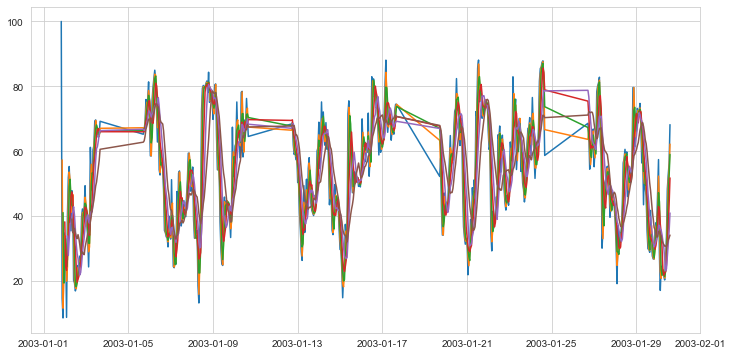

In [19]:
plt.figure(figsize=(12,6))

plt.plot(df_h1_merge['rsi_14'][:500], label='rsi14')
plt.plot(df_h1_merge['rsi_14_sma_02'][:500], label='rsi14_sma02')
plt.plot(df_h1_merge['rsi_14_sma_03'][:500], label='rsi14_sma03')
plt.plot(df_h1_merge['rsi_14_sma_05'][:500], label='rsi14_sma05')
plt.plot(df_h1_merge['rsi_14_sma_08'][:500], label='rsi14_sma08')
plt.plot(df_h1_merge['rsi_14_sma_13'][:500], label='rsi14_sma13')

In [20]:
df_h1_merge.head(10)

,open,high,low,close,results,hr_of_day,day_of_wk,shift_01,close_shift_01_dist,shift_02,close_shift_02_dist,shift_03,close_shift_03_dist,shift_05,close_shift_05_dist,shift_08,close_shift_08_dist,shift_13,close_shift_13_dist,shift_21,close_shift_21_dist,shift_34,close_shift_34_dist,shift_55,close_shift_55_dist,shift_89,close_shift_87_dist,shift_02m01,shift_03m02,shift_03m01,shift_05m03,shift_05m02,shift_05m01,shift_08m05,shift_08m03,shift_08m02,shift_08m01,shift_13m08,shift_13m05,shift_13m03,shift_13m02,shift_13m01,shift_21m13,shift_21m08,shift_21m05,shift_21m03,shift_21m02,shift_21m01,shift_34m21,shift_34m13,shift_34m08,shift_34m05,shift_34m03,shift_34m02,shift_34m01,shift_55m34,shift_55m21,shift_55m13,shift_55m08,shift_55m05,shift_55m03,shift_55m02,shift_55m01,shift_89m55,shift_89m34,shift_89m21,shift_89m13,shift_89m08,shift_89m05,shift_89m03,shift_89m02,shift_89m01,sma_02,close_sma_02_dist,sma_03,close_sma_03_dist,sma_05,close_sma_05_dist,sma_08,close_sma_08_dist,sma_13,close_sma_13_dist,sma_21,close_sma_21_dist,sma_34,close_sma_34_dist,sma_55,close_sma_55_dist,sma_89,close_sma_89_dist,sma_03m02,sma_05m03,sma_05m02,sma_08m05,sma_08m03,sma_08m02,sma_13m08,sma_13m05,sma_13m03,sma_13m02,sma_21m13,sma_21m08,sma_21m05,sma_21m03,sma_21m02,sma_34m21,sma_34m13,sma_34m08,sma_34m05,sma_34m03,sma_34m02,sma_55m34,sma_55m21,sma_55m13,sma_55m08,sma_55m05,sma_55m03,sma_55m02,sma_89m55,sma_89m34,sma_89m21,sma_89m13,sma_89m08,sma_89m05,sma_89m03,sma_89m02,diff,gain,loss,rsi_14,rsi_14_shift_01,rsi_14_shift_01_dist,rsi_14_shift_02,rsi_14_shift_02_dist,rsi_14_shift_03,rsi_14_shift_03_dist,rsi_14_shift_05,rsi_14_shift_05_dist,rsi_14_shift_08,rsi_14_shift_08_dist,rsi_14_shift_13,rsi_14_shift_13_dist,rsi_14_shift_21,rsi_14_shift_21_dist,rsi_14_shift_02m01,rsi_14_shift_03m02,rsi_14_shift_03m01,rsi_14_shift_05m03,rsi_14_shift_05m02,rsi_14_shift_05m01,rsi_14_shift_08m05,rsi_14_shift_08m03,rsi_14_shift_08m02,rsi_14_shift_08m01,rsi_14_shift_13m08,rsi_14_shift_13m05,rsi_14_shift_13m03,rsi_14_shift_13m02,rsi_14_shift_13m01,rsi_14_shift_21m13,rsi_14_shift_21m08,rsi_14_shift_21m05,rsi_14_shift_21m03,rsi_14_shift_21m02,rsi_14_shift_21m01,rsi_14_sma_02,rsi_14_sma_03,rsi_14_sma_05,rsi_14_sma_08,rsi_14_sma_13,rsi_14_sma_21,rsi_14_sma_03m02,rsi_14_sma_05m03,rsi_14_sma_05m02,rsi_14_sma_08m05,rsi_14_sma_08m03,rsi_14_sma_08m02,rsi_14_sma_13m08,rsi_14_sma_13m05,rsi_14_sma_13m03,rsi_14_sma_13m02,rsi_14_sma_21m13,rsi_14_sma_21m08,rsi_14_sma_21m05,rsi_14_sma_21m03,rsi_14_sma_21m02
2003-01-01 19:00:00,1.0504,1.0504,1.0476,1.0485,2,19,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-01 20:00:00,1.0487,1.0498,1.0485,1.0487,2,20,2,1.0485,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.04860,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0002,0.0002,0.0000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [21]:
df_h1_merge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105607 entries, 2003-01-01 19:00:00 to 2019-12-30 16:00:00
Columns: 186 entries, open to rsi_14_sma_21m02
dtypes: float64(183), int64(3)
memory usage: 150.7 MB


In [22]:
df_h1_merge.to_csv('../data/df_h1_feature.csv', index=True)